<a href="https://colab.research.google.com/github/anhnamxtanh/collecting-data-JSL/blob/master/data_collection_JSL_fingerspelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title


!git clone https://github.com/anhnamxtanh/collecting-data-JSL.git > /dev/null 2>&1

###########################################
###########################################

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.png'):
  js = Javascript('''
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      // google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/png');
    }
    ''')
  display(js)
  data = eval_js('takePhoto()')
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

###########################################
###########################################

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from datetime import datetime
import glob
import os

def capture(folder_name):
  if not os.path.exists('capture/' + folder_name):
    os.makedirs('capture/' + folder_name)

  for i in range(5):
    try:
      filename = take_photo('{}_{}.png'.format('capture/' + folder_name + '/' + folder_name + '_' + str(i), datetime.now().strftime("%y-%m-%d-%H-%M-%f")))
      print('Saved to {}'.format(filename))
    except Exception as err:
      # Errors will be thrown if the user does not have a webcam or if they do not
      # grant the page permission to access it.
      print(str(err))

base_path = '/content/collecting-data-JSL/sample_data/'

# show sample images
def jsl_fingerspelling(folder_name):
  data_path = glob.glob(base_path + folder_name + '/*')
  imgs = [mpimg.imread(img) for img in data_path]
  fig, axes = plt.subplots(1,4, figsize=(15,15))
  for ax in axes.flatten(): ax.axis('off')
  for i,(img,ax) in enumerate(zip(imgs, axes.flatten())): ax.imshow(img)    

# Collection

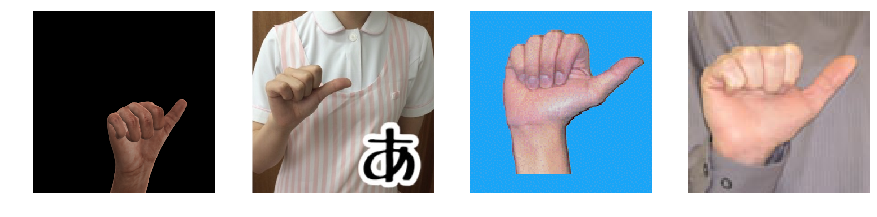

In [2]:
folder_name = "01_a" #@param ['01_a', '02_i', '03_u', '04_e', '05_o', '06_ka', '07_ki', '08_ku', '09_ke', '10_ko', '11_sa', '12_shi', '13_su', '14_se', '15_so', '16_ta', '17_chi', '18_tsu', '19_te', '20_to','21_na', '22_ni', '23_nu', '24_ne', '26_ha', '27_hi', '28_hu', '29_he', '30_ho', '31_ma','32_mi', '33_mu', '34_me', '36_ya', '38_yu', '40_yo', '41_ra', '43_ru', '44_re', '45_ro', '46_wa']
jsl_fingerspelling(folder_name)

In [3]:
capture(folder_name)

<IPython.core.display.Javascript object>

Saved to capture/01_a/01_a_0_19-09-25-05-33-773816.png


<IPython.core.display.Javascript object>

Saved to capture/01_a/01_a_1_19-09-25-05-33-353706.png


<IPython.core.display.Javascript object>

Saved to capture/01_a/01_a_2_19-09-25-05-33-678299.png


<IPython.core.display.Javascript object>

Saved to capture/01_a/01_a_3_19-09-25-05-33-325492.png


<IPython.core.display.Javascript object>

Saved to capture/01_a/01_a_4_19-09-25-05-34-873683.png


## Send results to me

In [4]:
#@title
!zip -r send_to_me.zip capture > /dev/null 2>&1

from google.colab import drive
drive.mount('/content/drive')

!cp  send_to_me.zip '/content/drive/My Drive'

print('\n ########################################### \n')
print('Finish! Thank you for your hard working!')
print('Lets go to Google driver and share "send_to_me.zip" to namnt@lee-lab.org ')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive

 ########################################### 

Finish! Thank you for your hard working!
Lets go to Google driver and share "send_to_me.zip" to namnt@lee-lab.org 
